import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


In [2]:
data=pd.read_csv("E:\\dataset\\insurance.csv")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
# number of rows and columns
data.shape

(1338, 7)

In [4]:
# getting some informations about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
# checking for missing values
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
# checking for duplicate rows values
data.duplicated().sum()

1

In [7]:
data.drop_duplicates(inplace=True)

In [8]:
# checking for duplicate rows values
data.duplicated().sum()

0

In [9]:
# statistical Measures of the dataset
data.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


C:\Users\hagag\AppData\Local\Temp\ipykernel_6224\934270653.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['age'])
E:\app\Anaconda-files\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


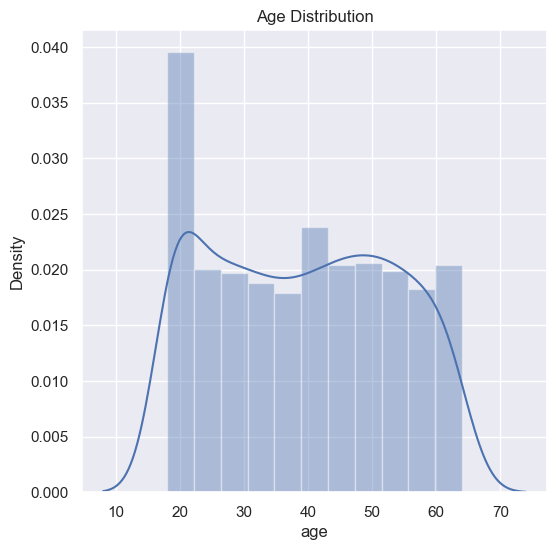

In [10]:
# distribution of age value
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(data['age'])
plt.title('Age Distribution')
plt.show()

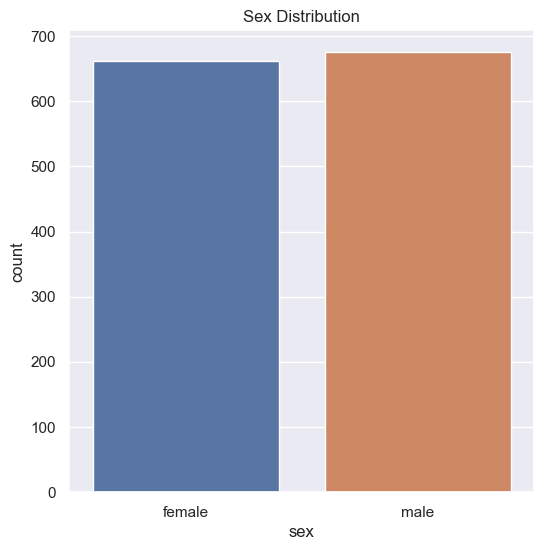

In [11]:
# Gender column
plt.figure(figsize=(6,6))
sns.countplot(x='sex', data=data)
plt.title('Sex Distribution')
plt.show()

In [12]:
data['sex'].value_counts()

sex
male      675
female    662
Name: count, dtype: int64

C:\Users\hagag\AppData\Local\Temp\ipykernel_6224\2852162216.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['bmi'])
E:\app\Anaconda-files\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


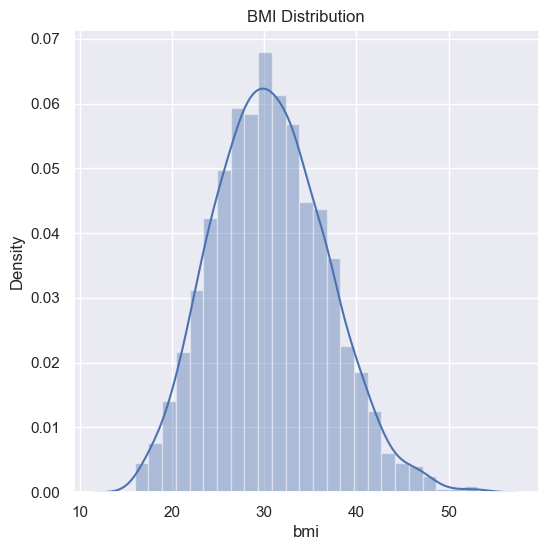

In [13]:
# bmi distribution
plt.figure(figsize=(6,6))
sns.distplot(data['bmi'])
plt.title('BMI Distribution')
plt.show()

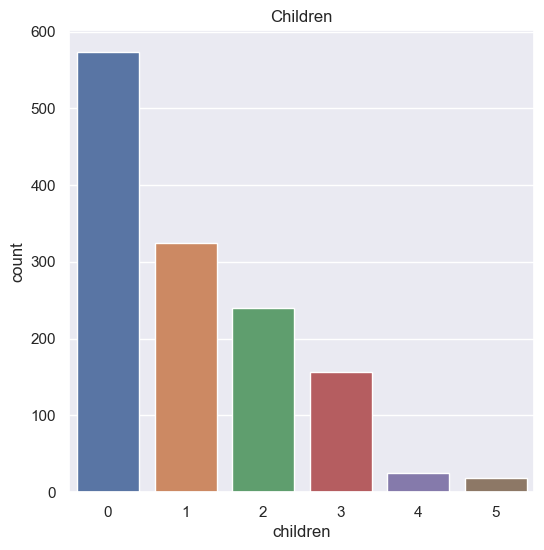

In [14]:
# children column
plt.figure(figsize=(6,6))
sns.countplot(x='children', data=data)
plt.title('Children')
plt.show()

In [15]:
data['children'].value_counts()

children
0    573
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

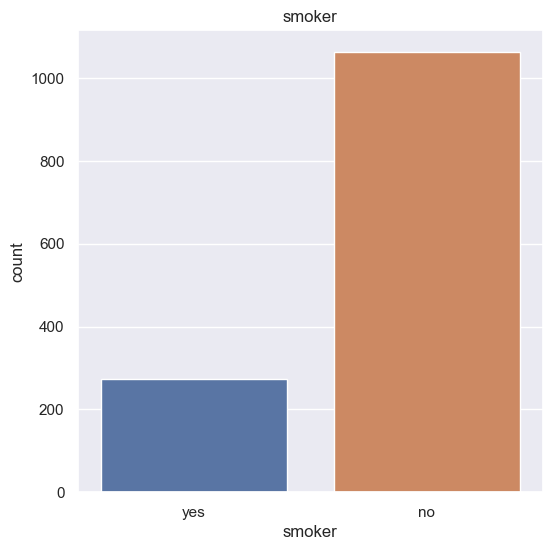

In [16]:
# smoker column
plt.figure(figsize=(6,6))
sns.countplot(x='smoker', data=data)
plt.title('smoker')
plt.show()

In [17]:
data['smoker'].value_counts()

smoker
no     1063
yes     274
Name: count, dtype: int64

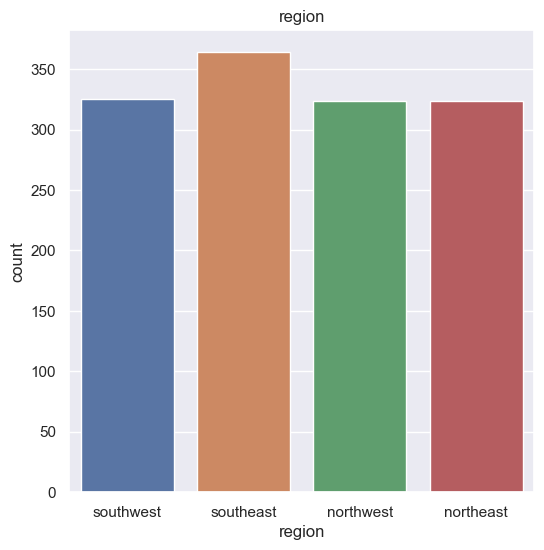

In [18]:
# region column
plt.figure(figsize=(6,6))
sns.countplot(x='region', data=data)
plt.title('region')
plt.show()

In [19]:
data['region'].value_counts()

region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64

C:\Users\hagag\AppData\Local\Temp\ipykernel_6224\1423672458.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['charges'])
E:\app\Anaconda-files\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


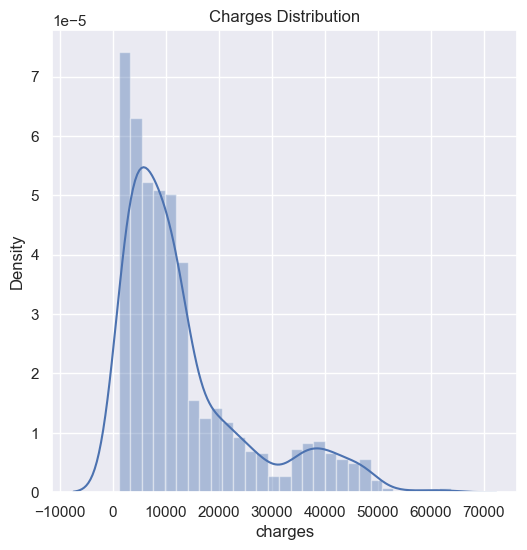

In [20]:
# distribution of charges value
plt.figure(figsize=(6,6))
sns.distplot(data['charges'])
plt.title('Charges Distribution')
plt.show()

<Figure size 600x600 with 0 Axes>

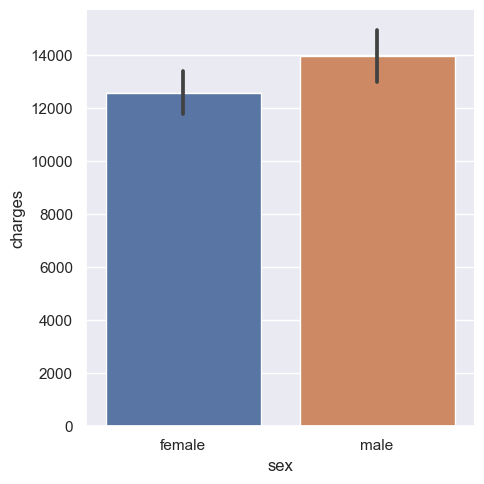

In [21]:
# distribution of charges value
plt.figure(figsize=(6,6))
sns.catplot(data=data,x='sex',y='charges',kind='bar')
plt.show()

<Figure size 600x600 with 0 Axes>

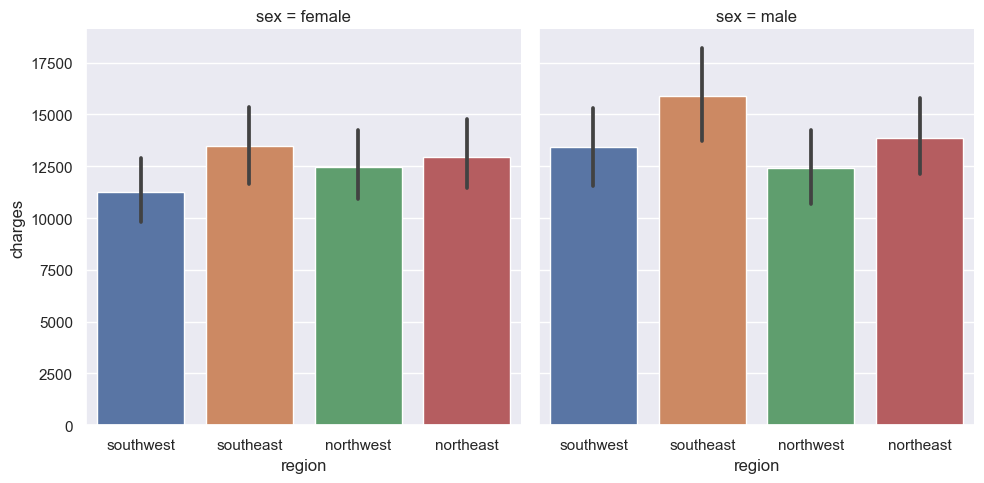

In [22]:
#relation charges by region According to  sex
plt.figure(figsize=(6,6))
sns.catplot(data=data,x='region',y='charges',kind='bar',col='sex')
plt.show()

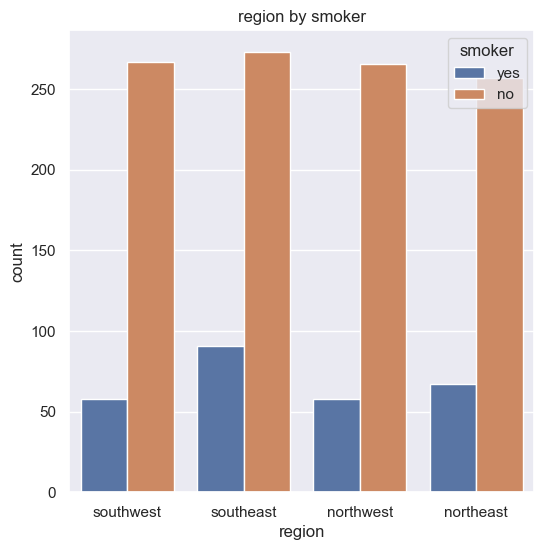

In [23]:
plt.figure(figsize=(6,6))
sns.countplot(x='region', data=data,hue='smoker')
plt.title('region by smoker')
plt.show()

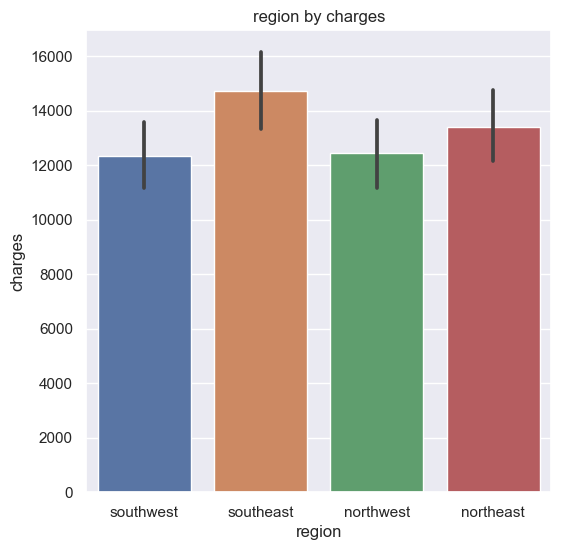

In [24]:
plt.figure(figsize=(6,6))
sns.barplot(x='region', data=data,y='charges')
plt.title('region by charges')
plt.show()

Data Pre-Processing
Encoding the categorical features

In [25]:
# encoding sex column
data.replace({'sex':{'male':0,'female':1}}, inplace=True)

3 # encoding 'smoker' column
data.replace({'smoker':{'yes':0,'no':1}}, inplace=True)

# encoding 'region' column
data.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}}, inplace=True)

In [26]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520


In [27]:
x = data.drop(columns=['charges'], axis=1)
y = data['charges']

In [28]:
x_train, x_test, y_train,y_test = train_test_split(x, y, test_size=0.30, random_state=2,shuffle=True)

In [29]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [30]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [31]:
# prediction on training data
training_data_prediction =regressor.predict(x_train)

In [32]:
# R squared value
r2_train = metrics.r2_score(y_train, training_data_prediction)
print('R squared vale : ', r2_train)

R squared vale :  0.7508317880645194


In [33]:
# prediction on test data
test_data_prediction =regressor.predict(x_test)

In [34]:
# R squared value
r2_test = metrics.r2_score(y_test, test_data_prediction)
print('R squared vale : ', r2_test)

R squared vale :  0.7403325409507828


Building a Predictive System

In [35]:
input_data = (31,1,25.74,0,1,0)

# changing input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = regressor.predict(input_data_reshaped)
print(prediction)

print('The insurance cost is USD ', prediction[0])

[165039.86672414]
The insurance cost is USD  165039.86672414042
